#### Hierarchical Clustering
1. Agglomerative HC --> bottom to top
2. Divisive HC --> top to bottom

<br>
<small>

<b>Agglomerative HC: </b> 

1. make each data point a single-point cluster --> that forms N clusters
2. take the two closest data points and make them one cluster --> that forms N-1 cluster
3. take the two <b>closest clusters</b> and make them one cluster --> that forms N-2 clusters
4. repeat step-3 until there is only one cluster

<br>

<b>Distance between two clusters:</b>

- option 1: closest points
- option 2: furthest points
- option 3: average distance
- option 4: distance between centroids

<br>

<b>Dendrogram:</b> <br>
A tree-like diagram used in hierarchical clustering. Its main parts include:

- Leaves: Individual data points.
- Branches: Lines connecting data points or clusters.
- Nodes: Points where clusters merge.
- Height: Represents the distance between clusters.
- Root Node: The final cluster containing all data points. <br>

It shows how data points group based on similarity.

<br>
In a dendrogram, the <b>cut-off line </b>serves as a threshold for clustering. It determines the number of clusters by cutting the tree at a specific height (middle of the longest distance). Clusters below the line merge, while those above remain separate. Adjusting this line controls the final cluster count.
</small>

Importing the libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [33]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

Using the dendrogram to find the optimal number of cluster

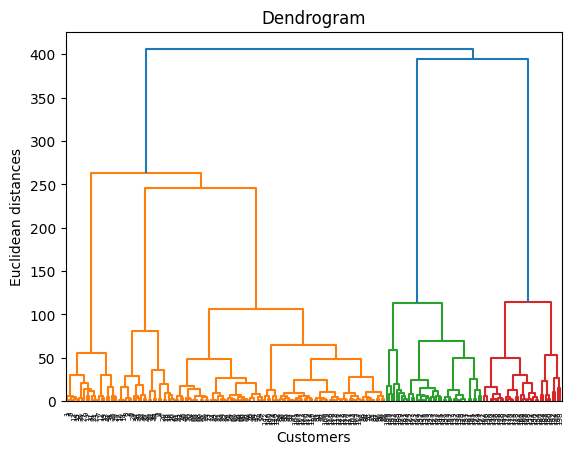

In [34]:
# from scipy import cluster.hierarchy
import scipy.cluster.hierarchy as sch 

# Ward's method is a hierarchical clustering technique that minimizes the increase in variance 
# when merging two clusters, aiming to create compact and well-separated groups.
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Training the Hierarchical Clustering model on the dataset

In [35]:
from sklearn.cluster import AgglomerativeClustering
# hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(X)


In [36]:
print(y_hc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


Visualizing the clusters

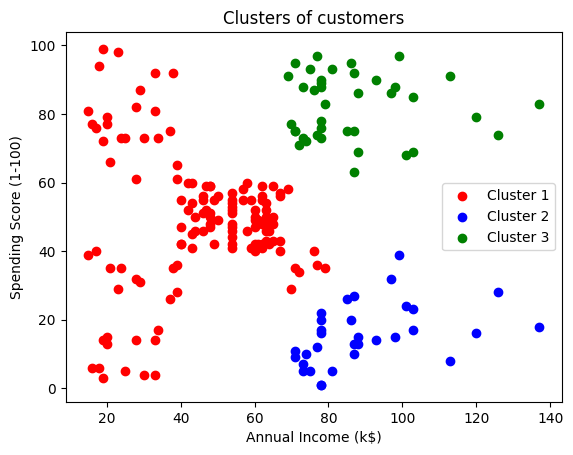

In [37]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], color='red', label='Cluster 1')

plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], color='blue', label='Cluster 2')

plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], color='green', label='Cluster 3')

# plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], color='cyan', label='Cluster 4')

# plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], color='magenta', label='Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()